# Pandas Data Analysis Assignment - Custom Data Sets

### Name Here: Veronica Trejo
### Date Here: 4/8/25

## Objective
In this assignment, you will work with a real-world dataset of your choosing and continue to grow your skills in data analysis using pandas.

Below are some of the packages that you can utilize (pandas being required). These are linked to the documentation for your reference.

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)\
[Numpy](https://numpy.org/doc/)\
[Matplotlib](https://matplotlib.org/stable/index.html)\
[seaborn](https://seaborn.pydata.org/index.html)


## Data Source

First of all, please select a dataset for this assignment from online. There are suggested sources in the dataset ipynb file I've provided.


In [22]:
# Import packages used. You may have to pip install some of these. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

print("All packages are loaded")
# import the dataset. 
import pandas as pd 

# Load the dataset as a dataframe
df = pd.read_csv("title.ratings.tsv.gz", sep="\t", compression="gzip")

# Display first 10 rows of your dataset.
print(df.head(10))

All packages are loaded
      tconst  averageRating  numVotes
0  tt0000001            5.7      2146
1  tt0000002            5.5       292
2  tt0000003            6.5      2181
3  tt0000004            5.3       188
4  tt0000005            6.2      2924
5  tt0000006            5.0       210
6  tt0000007            5.3       906
7  tt0000008            5.4      2292
8  tt0000009            5.4       223
9  tt0000010            6.8      7923


## Data Cleaning & Exploration

In [26]:
# Analyze your data (show in outputs) and clean the data as is appropriate.
print (df.info())

print(df.describe())

print(df.head())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555765 entries, 0 to 1555764
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1555765 non-null  object 
 1   averageRating  1555765 non-null  float64
 2   numVotes       1555765 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.6+ MB
None
       averageRating      numVotes
count   1.555765e+06  1.555765e+06
mean    6.950955e+00  1.023750e+03
std     1.387790e+00  1.782190e+04
min     1.000000e+00  5.000000e+00
25%     6.200000e+00  1.100000e+01
50%     7.100000e+00  2.600000e+01
75%     7.900000e+00  1.000000e+02
max     1.000000e+01  3.029407e+06
      tconst  averageRating  numVotes
0  tt0000001            5.7      2146
1  tt0000002            5.5       292
2  tt0000003            6.5      2181
3  tt0000004            5.3       188
4  tt0000005            6.2      2924
tconst           0
averageRating    0
numVotes 

I want to try and filter out any of the titles or 'tconst' that have LOW rating

In [31]:
df_cleaned = df[df["numVotes"] >= 1000]

print(df_cleaned.describe())

df.info()

df.describe()

df.isnull().sum()

       averageRating      numVotes
count   95789.000000  9.578900e+04
mean        6.965807  1.535693e+04
std         1.348823  7.028105e+04
min         1.000000  1.000000e+03
25%         6.200000  1.499000e+03
50%         7.100000  2.587000e+03
75%         7.900000  5.964000e+03
max        10.000000  3.029407e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555765 entries, 0 to 1555764
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1555765 non-null  object 
 1   averageRating  1555765 non-null  float64
 2   numVotes       1555765 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.6+ MB


tconst           0
averageRating    0
numVotes         0
dtype: int64

In [9]:
# Tell me about the data after you've cleaned it up. Show what data types are in the dataset, also show how many rows and columns are in the data set. 

In [30]:
print(df_cleaned.dtypes)

print("Number of rows:", df_cleaned.shape[0])
print("Number of columns:", df_cleaned.shape[1])

tconst            object
averageRating    float64
numVotes           int64
dtype: object
Number of rows: 95789
Number of columns: 3


## Data Manipulation

In [10]:
# Add at least two additional features to your data (additional calculated columns) to be used in your analysis.

First I want to try and add an average rating to the dataset. Since I chose to use IMDb for their show/movie ratings, I thought it would be fun to rank them on low, medium, high. Being a bit of a movie freak myself, I knew I wanted my dataset to be a bit easier and something I could go back to whenever I need something to watch and rot a bit. I also wanted to add on a popularity rating to give a bit of depth when choosing movies. If there is a movie that is "not the vibe" but has a "high" rating, then maybe it is something to keep in the back pocket when you want a background movie to do chores to. It also allows for movies that are "popular" and "low" rating to be the center of conversations among friends, or even your own internal dialogue.

In [41]:
df_cleaned = df[df["numVotes"] >1000].copy()

def categorize_rating(rating):
    if rating >=8:
        return "High"
    elif rating >=6:
        return "Medium"
    else:
        return "Low"
    
df_cleaned["ratingCategory"] = df_cleaned["averageRating"].apply(categorize_rating)

def categorize_votes(votes):
    if votes >100000:
        return "Super Popular"
    elif votes >=10000:
        return "Popular"
    else:
        return "Not The Vibe"
    
df_cleaned["voteCategory"] = df_cleaned["numVotes"].apply(categorize_votes)

print(df_cleaned[["tconst", "averageRating", "ratingCategory", "numVotes", "voteCategory"]].head(10))


       tconst  averageRating ratingCategory  numVotes  voteCategory
0   tt0000001            5.7            Low      2146  Not The Vibe
2   tt0000003            6.5         Medium      2181  Not The Vibe
4   tt0000005            6.2         Medium      2924  Not The Vibe
7   tt0000008            5.4            Low      2292  Not The Vibe
9   tt0000010            6.8         Medium      7923  Not The Vibe
11  tt0000012            7.4         Medium     13447       Popular
12  tt0000013            5.7            Low      2064  Not The Vibe
13  tt0000014            7.1         Medium      6138  Not The Vibe
14  tt0000015            6.1         Medium      1272  Not The Vibe
15  tt0000016            5.9            Low      1656  Not The Vibe


## Data Analysis

In [11]:
# Perform your analysis here. Your analysis should thoughtful, and provide at least two insights that are not obvious when looking at the dataframe. 

For the first part of my analysis, I feel confident that my code is working well enough to explore this dataset. I wanted to start by looking at whether popular movies tend to have higher ratings. I used the average rating from my cleaned dataset (df_cleaned) to compare the vote categories I created.
From the code below, I found that the “Popular” and “Not The Vibe” categories are closer in rating than I expected. While “Super Popular” and “Popular” appear to have similar average ratings, there needs to be some consideration for the magnitude of people who voted, which might skew the perception of quality. I’m now really curious to dig into the individual movies and shows within these categories to see what they are, and whether I would rate them similarly or if my taste totally breaks from the masses 

In [42]:
avg_ratings_by_popularity = df_cleaned.groupby("voteCategory")["averageRating"].mean()
print(avg_ratings_by_popularity)


voteCategory
Not The Vibe     6.972906
Popular          6.883761
Super Popular    7.147459
Name: averageRating, dtype: float64


Next, I wanted to look at the movies and shows that were rated as “Low.” I was curious to see how many votes they actually received to earn such a low rating. From the code below, there is a HUGE discrepancy in the number of votes across the three rating categories. What stood out to me is that the average vote count for “Low” rated titles is almost half that of “Medium” rated ones. It makes me wonder if lower ratings are more common in lesser-known titles, or if people just don’t bother voting when they don’t like something. Either way, the contrast is way more dramatic than I expected 

In [43]:
vote_counts_by_rating = df_cleaned.groupby("ratingCategory")["numVotes"].mean()
print(vote_counts_by_rating)


ratingCategory
High      17627.392039
Low        8678.515098
Medium    16764.632976
Name: numVotes, dtype: float64


## Data Visualization

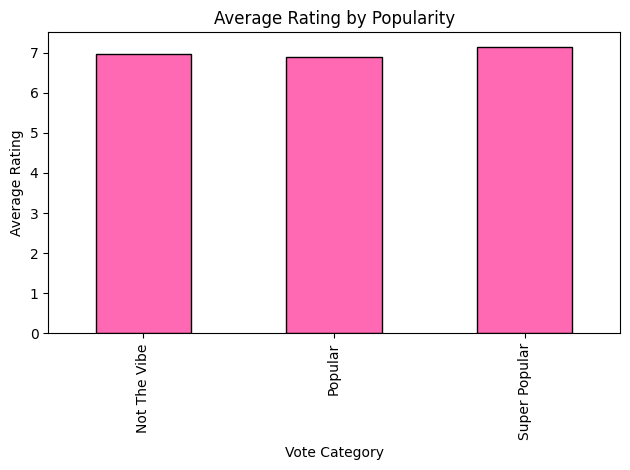

In [46]:
# Bolster your analysis with at least two visualizations.
df_cleaned.groupby("voteCategory")["averageRating"].mean().plot(
    kind="bar", color="#FF69B4", edgecolor="black"
)

plt.title("Average Rating by Popularity")
plt.xlabel("Vote Category")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()



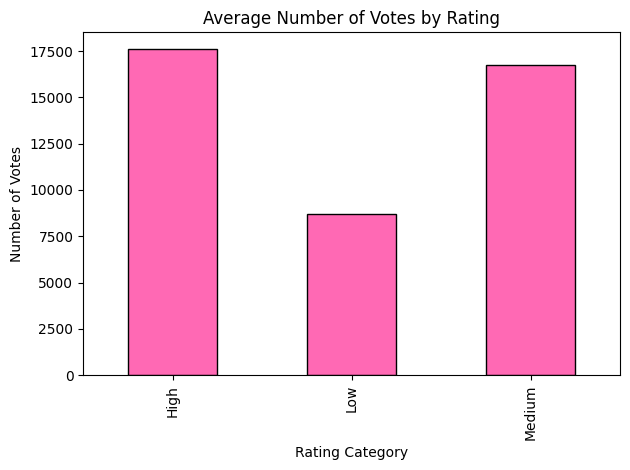

In [47]:
df_cleaned.groupby("ratingCategory")["numVotes"].mean().plot(
    kind="bar", color="#FF69B4", edgecolor="black"
)

plt.title("Average Number of Votes by Rating")
plt.xlabel("Rating Category")
plt.ylabel("Number of Votes")
plt.tight_layout()
plt.show()


To start off the analysis for my two visuals, I wanted to add a bit more of my personality to them, so I chose to find the exact color codes to get the perfect pink. In the first graph, I wanted to show the average IMDb rating across the different vote categories. Much like the analysis above, the “Super Popular” and “Popular” categories are close in rating, and that can now be seen visually. We can make the assumption that how often a movie or show is watched does not always mean it is more loved. For the second graph, I chose to focus more on how many votes each rating category tends to receive. The “High” and “Medium” rated titles get more attention than the “Low” rated ones, which is to be expected. This could be because people are more likely to rate things they enjoy and want to give more exposure to. It also gets me thinking that lower-rated movies are either skipped over because of the rating or simply because people just do not like them.

## Analysis

In the markdown block below, give me a written analysis of your code blocks above. This is the area to provide written responses to accompany your work in the Data Analysis and Data Visualization coding you did above. 

## Grading Rubric

Grading overall will be on a 100-point scale. Everyone starts with 100, the final score will be determined based on point deductions related to the overall quality of your code and analysis. The expectation for code is that comments will be included as appropriate, the code is easy to read, efficient, and performs the tasks asked of you. Grading will be more lenient if you attempt more complex code or combinations of code (assuming it makes sense to do so). The analysis will be scored based on proper grammar (spelling, format, composition), and how practical and thoughtful it is. If you have any questions, think about the "cold reader" rule, "Would someone with basic knowledge of this subject matter be able to read through my work in one shot without a lot of questions?"

Lastly, while collaboration on theory and methods is encouraged, DO NOT share your code line for line with your classmates. Blatant and obvious copying of any parts of your assignment will lead to deductions. This is the time to really develop your individual and analysis styles. 


